In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, regularizers
from sklearn.model_selection import train_test_split
from helper import plot_weights

In [2]:
# Use the helper code below to generate the data

# Define the number of data points to generate
num_points = 30 

# Generate predictor points (x) between 0 and 5
x = np.linspace(0,5,num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [4]:
### edTest(test_params) ###
# Define a Neural network with L1 regularization
model = Sequential(name='l1_reg')

# Select the number of nodes in each hidden layer as 5
n_hidden = 5

# Add L1 regularization with value 0.1 regularization value
myl1_reg = regularizers.L1(l1=0.1)

# Add 2 dense hidden layers with n_hidden neurons and use 'tanh' activation. 
# Make sure you use l1 regularization
model.add(Dense(n_hidden,input_shape=(1,),activation='tanh',kernel_regularizer=myl1_reg))
model.add(Dense(n_hidden,activation='tanh',kernel_regularizer=myl1_reg))

# Add the output layer with one neuron, l1 regularization and 
# 'linear' activation
model.add(Dense(1))

# Compile the model. Choose a large learning rate such as 0.01
opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,loss='mean_squared_error',metrics='mean_squared_error') 

# Check model summary
model.summary()

Model: "l1_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


### ⏸ Why does `model.summary()` show 46 trainable parameters?

#### A. Model has 25 weights and 21 biases
#### B. Model has 35 weights and 11 biases
#### C. Model has 40 weights and 6 biases
#### D. Model has 30 weights and 16 biases

In [5]:
### edTest(test_chow1) ###

# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'B'

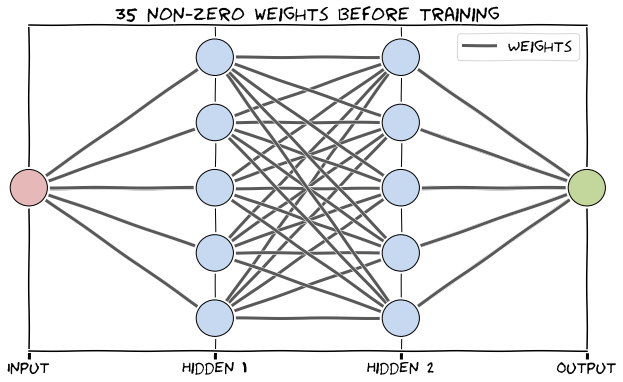

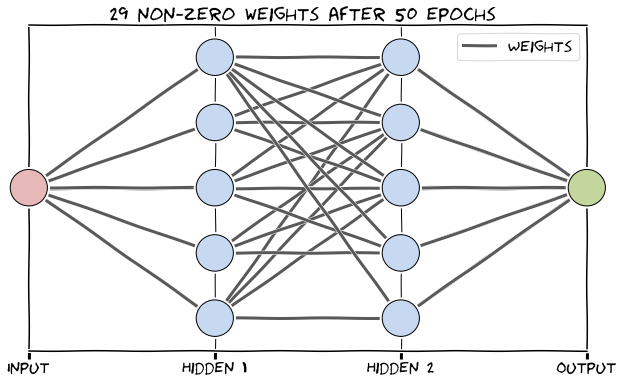

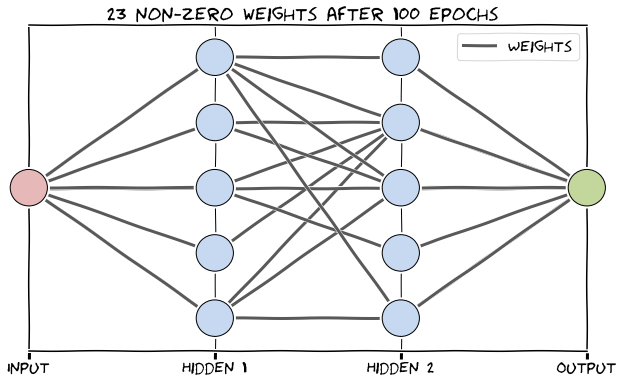

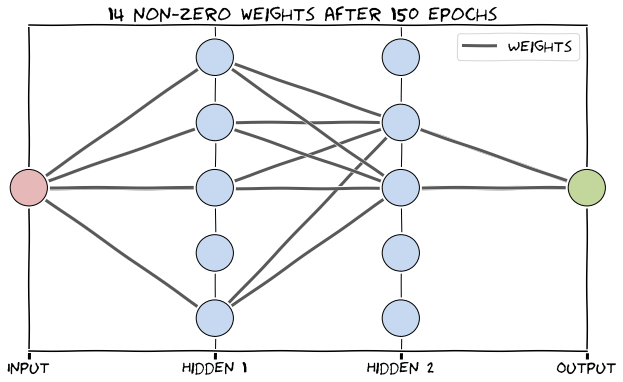

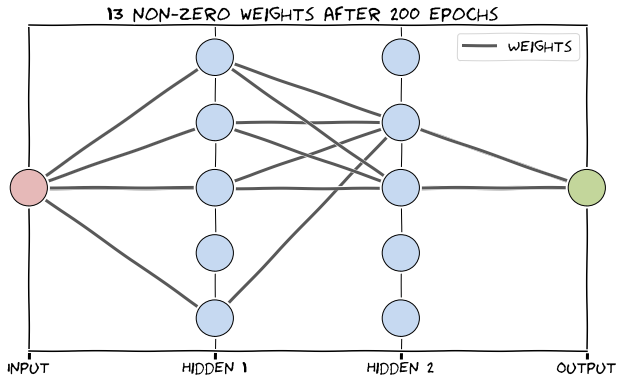

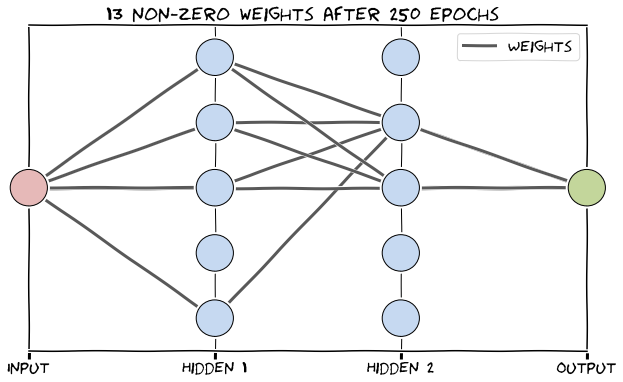

In [6]:
# Use the code below to plot the neural network as we train the model 
for i in range(6): 
    plot_weights(model,epochnum =i*50,n_hidden=n_hidden)         
    model.fit(x_train, y_train,  validation_split=0.2, epochs=50, batch_size=10, verbose=0)


### ⏸ Go back and change the amount of $L_1$ regularization. How does it affect the vanishing of weights?

In [7]:
### edTest(test_chow2) ###

# Type your answer within in the quotes given
answer2 = 'Larger l1 regularization creates even more sparsity, while smaller l2 regularization allow for more weights to participate'